## Diabetes prediction


In [36]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [37]:
df = pd.read_csv('/config/workspace/Dataset/diabetes.csv')

In [38]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
df.shape

(768, 9)

In [40]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [41]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

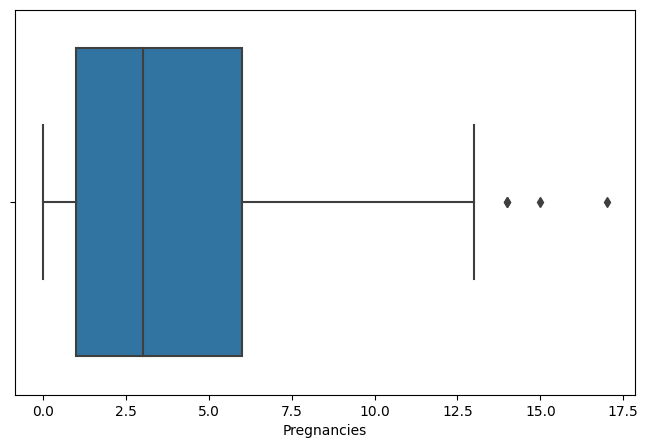

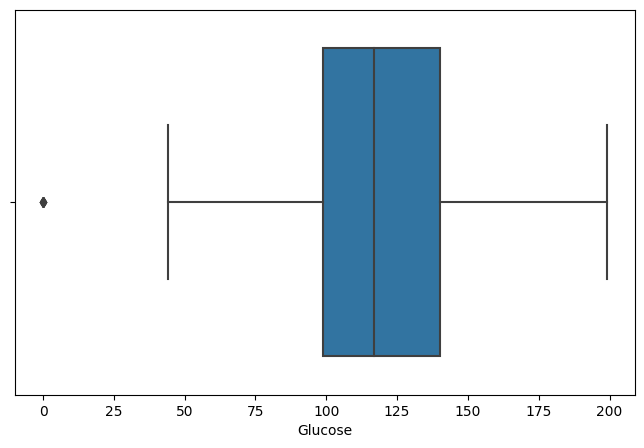

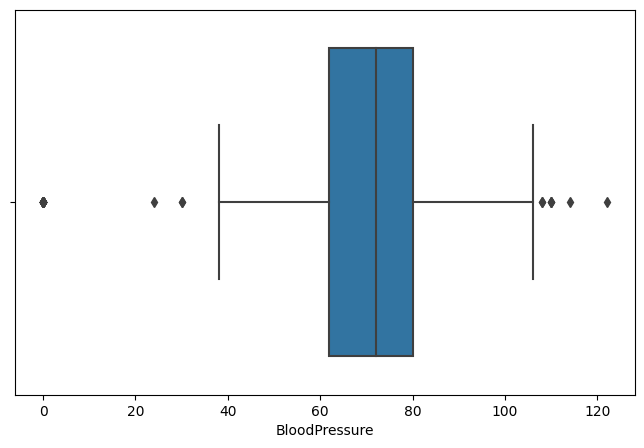

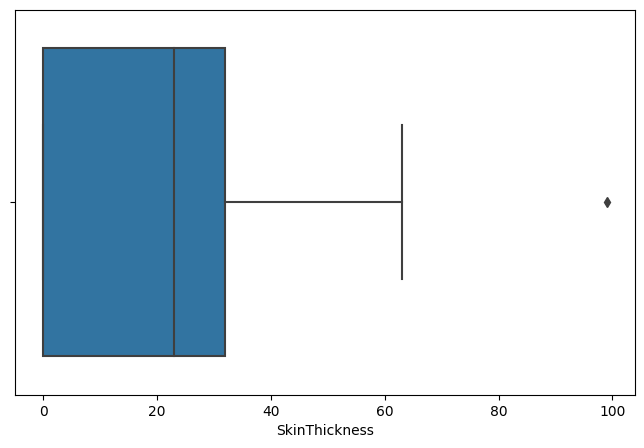

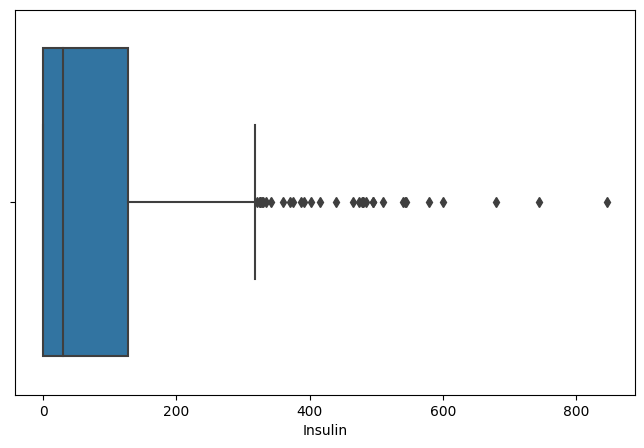

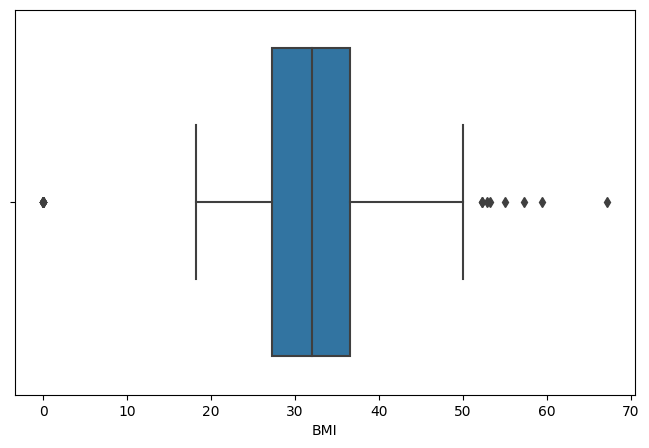

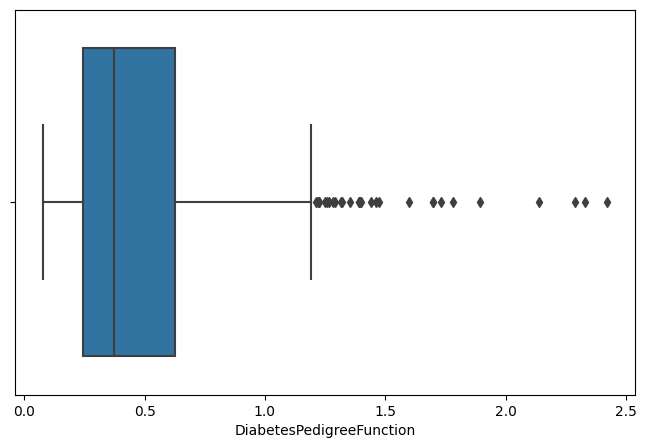

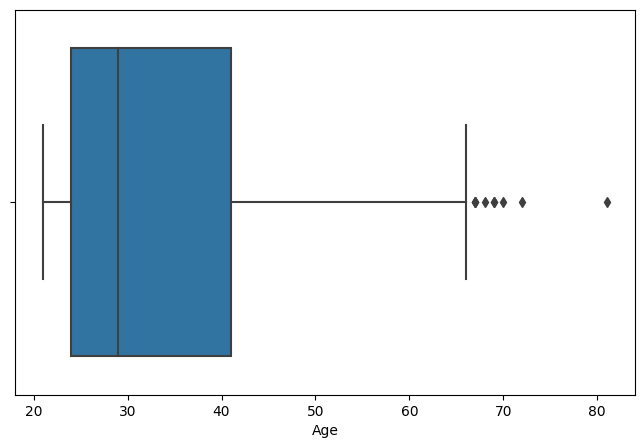

In [42]:
for i in df.columns:
    if i!= 'Outcome':
        plt.subplots(1,1,figsize=(8,5))
        sns.boxplot(data=df,x=i)

In [43]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- We can see that few columns like Bloodpressure, SkinThickness, Insuling, BMI have 0 value, which is not possible

- So we will replace those missing values with mean.

- Insulin column has so many outliers, but these outliers don't seem because of data entry.


In [44]:
df['BMI']= df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure']= df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose']= df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin']= df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness']= df['SkinThickness'].replace(0,df['SkinThickness'].mean())


- We will also do this in model training file.

In [45]:
# minimum,Q1,Q2,Q3,maximum=np.quantile(df['Insulin'],[0,0.25,0.50,0.75,1.0])
# print(minimum,Q1,Q2,Q3,maximum)
# IQR=Q3-Q1
# print(IQR)



In [46]:
# lower_fence=Q1-1.5*(IQR)
# higher_fence=Q3+1.5*(IQR)

In [47]:
# lower_fence,higher_fence

In [48]:
# outliers=[]
# for i in ['Insulin']:
#     df.loc[df[i]>318.25,i]=np.nan

In [49]:
# df.isnull().sum()

In [50]:
# df = df.dropna()

In [51]:
df.shape

(768, 9)

In [52]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [53]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


/tmp/ipykernel_1169/4107119561.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BMI'])


<Axes: xlabel='BMI', ylabel='Density'>

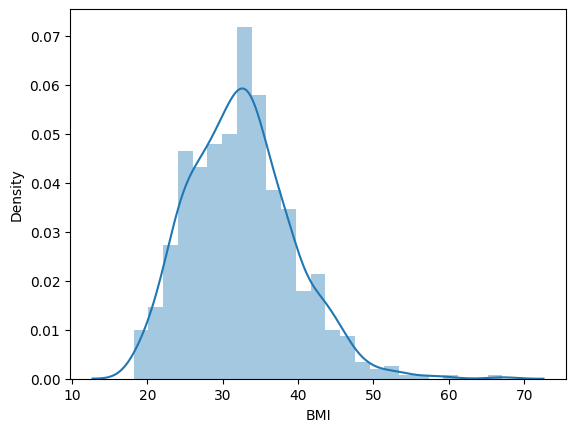

In [54]:
sns.distplot(df['BMI'])

<Axes: xlabel='BMI', ylabel='Count'>

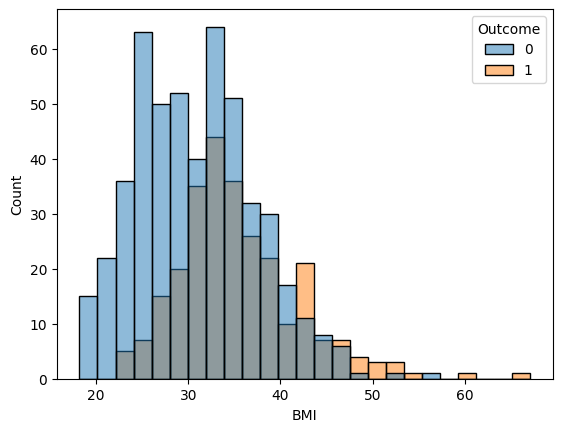

In [55]:
sns.histplot(data=df,x="BMI",hue='Outcome')

- It can be observed that overweight people have more chances of Diabetes
- people who have BMI of less than 26, have very less chances of Diabetes
- There are very high chances of Diabetes for BMI more than 35
- BMI more than 40 indicates approximately 95% chances of Diabestes

In [56]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


<Axes: >

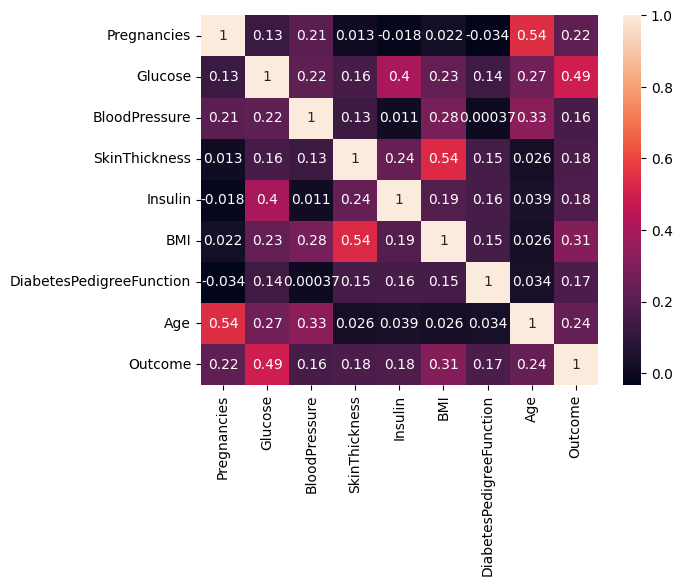

In [57]:
sns.heatmap(df.corr(), annot=True)